# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
data = requests.get(btc_url)
btc_data = data.json()
current_btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
data = requests.get(eth_url)
eth_data = data.json()
current_eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} USD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} USD")

The current value of your 1.2 BTC is $45282.00 USD
The current value of your 5.3 ETH is $12414.93 USD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-06-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-04", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers_df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000).df

# Drop the nulls
tickers_df.dropna(inplace=True)

# Preview DataFrame
tickers_df

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2017-06-15 00:00:00-04:00  109.90  109.90  109.780  109.870  1938779  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.850  109.945  1709677  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.740  109.790  1375531  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.800  109.975  2010628  244.25   
2017-06-21 00:00:00-04:00  109.88  110.04  109.880  109.980  1085301  243.43   
...                           ...     ...      ...      ...      ...     ...   
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451  420.97   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159  422.57   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317  420.37   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096  417.87   
2021-06-04 00:00:00-04:00  114.39  114.67  114.220  114.665  4334878  420.75   

                                                               
                             high       low   close    volume  
time                                                           
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167  
2017-06-21 00:00:00-04:00  243.59  242.4100  242.95  42746920  
...                           ...       ...     ...       ...  
2021-05-28 00:00:00-04:00  421.25  419.7900  420.02  49200328  
2021-06-01 00:00:00-04:00  422.72  419.2000  419.63  47607950  
2021-06-02 00:00:00-04:00  421.23  419.2900  420.38  41250387  
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  422.92  418.8422  422.57  45129316  

[1000 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
current_agg_close = tickers_df["AGG"]["close"].iloc[-1]
current_spy_close = tickers_df["SPY"]["close"].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${current_agg_close} USD")
print(f"Current SPY closing price: ${current_spy_close} USD")


Current AGG closing price: $114.665 USD
Current SPY closing price: $422.57 USD


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * current_agg_close
my_spy_value = my_spy * current_spy_close

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f} USD")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f} USD")

The current value of your 200 AGG shares is $22933.00 USD
The current value of your 50 SPY shares is $21128.50 USD


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data, create variables for total assets in each category and indexes
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
indexes = ["crypto", "shares"]
df_savings_data = {"amount":[total_crypto, total_shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(df_savings_data, index=indexes)

# Display savings DataFrame
df_savings

,amount
crypto,57696.932
shares,44061.500


<AxesSubplot:ylabel='amount'>

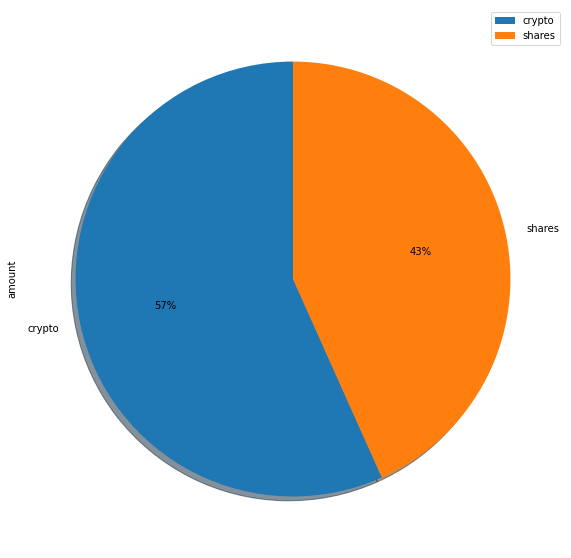

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(15,10), autopct='%0.f%%', shadow=True, startangle=90)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_value = total_shares + total_crypto

# Validate saving health
if total_value > emergency_fund:
    print (f"Congratulations, your ${total_value} is enough money to cover an emergency.")
elif total_value == emergency_fund:
    print (f"Your portfolio is worth ${total_value}. Congratulations on reaching this financial goal.")
elif total_value < emergency_fund:
    print (f"You are ${(emergency_fund - total_value)} away from reaching an emergency fund.")

Congratulations, your $101758.432 is enough money to cover an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Take away the time portion of the date for easier viewing
tickers_df.index = tickers_df.index.date

# Display sample data
tickers_df

AGG                                        SPY          \
              open    high      low    close   volume    open    high   
2017-06-15  109.90  109.90  109.780  109.870  1938779  242.68  243.91   
2017-06-16  109.86  109.97  109.850  109.945  1709677  242.77  242.83   
2017-06-19  109.87  109.90  109.740  109.790  1375531  243.59  244.73   
2017-06-20  109.85  110.03  109.800  109.975  2010628  244.25  244.26   
2017-06-21  109.88  110.04  109.880  109.980  1085301  243.43  243.59   
...            ...     ...      ...      ...      ...     ...     ...   
2021-05-28  114.55  114.68  114.500  114.510  6186451  420.97  421.25   
2021-06-01  114.40  114.40  114.164  114.340  5655159  422.57  422.72   
2021-06-02  114.45  114.51  114.300  114.485  5649317  420.37  421.23   
2021-06-03  114.31  114.46  114.210  114.210  3270096  417.87  419.99   
2021-06-04  114.39  114.67  114.220  114.665  4334878  420.75  422.92   

                                        
                 low   close    volume  
2017-06-15  242.3600  243.79  51523068  
2017-06-16  241.6337  242.63  48998243  
2017-06-19  243.4800  244.64  42503652  
2017-06-20  242.9900  243.04  39203167  
2017-06-21  242.4100  242.95  42746920  
...              ...     ...       ...  
2021-05-28  419.7900  420.02  49200328  
2021-06-01  419.2000  419.63  47607950  
2021-06-02  419.2900  420.38  41250387  
2021-06-03  416.2800  418.86  51582905  
2021-06-04  418.8422  422.57  45129316  

[1000 rows x 10 columns]

In [15]:
# Set the weights 
weights = [.4, .6]

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks = MCSimulation(
    portfolio_data = tickers_df,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30)


In [16]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005259,0.989226,1.000557,1.004154,0.998573,0.996983,1.011809,0.997685,1.004433,0.997305,...,0.985171,1.006846,1.005885,0.994620,0.997441,0.998357,1.015419,0.998793,0.997373,0.973390
2,1.012885,0.987926,0.994573,1.010908,0.994065,0.983300,1.009467,1.007573,0.994757,0.997642,...,0.985716,1.001554,0.993072,1.005409,0.995090,1.001062,1.009676,1.012195,0.994551,0.979548
3,1.018815,0.985843,0.999260,1.030822,0.995591,0.986653,0.999086,1.008153,0.993565,0.992166,...,0.983051,1.000774,0.981051,1.000820,0.969677,1.002823,1.011744,1.020798,1.001844,0.980311
4,1.006188,0.984241,1.003300,1.032973,0.994818,0.992296,1.005667,1.003077,0.990257,0.982734,...,0.989574,1.003874,0.979070,0.996165,0.976498,1.006153,1.003122,1.026323,1.006336,0.964392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.050108,6.297623,53.272401,17.953505,10.878030,10.877324,43.741777,19.796423,9.618361,12.494978,...,15.431370,9.485937,14.727007,36.150127,12.982510,11.265952,7.331845,6.483285,4.425130,17.535560
7557,25.109145,6.268120,53.020799,17.957141,10.915221,11.010245,43.126063,19.834751,9.553642,12.586542,...,15.546260,9.538314,14.478372,36.014806,12.997690,11.269909,7.207775,6.486997,4.408394,17.739067
7558,24.894026,6.292541,52.728602,17.966042,10.952802,10.997946,43.041216,19.997719,9.747869,12.587244,...,15.678964,9.389772,14.456887,36.140360,13.020417,11.461304,7.213578,6.486394,4.434162,17.679592
7559,25.100229,6.244603,52.315109,18.012444,10.787224,10.944028,43.124876,19.937186,9.726022,12.556260,...,15.821207,9.300443,14.385252,35.694135,12.981912,11.475660,7.271670,6.456501,4.469044,17.807104


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

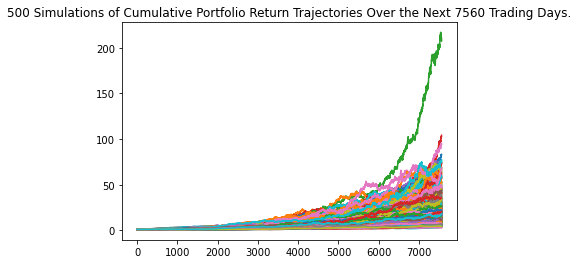

In [17]:
# Plot simulation outcomes
MC_stocks.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

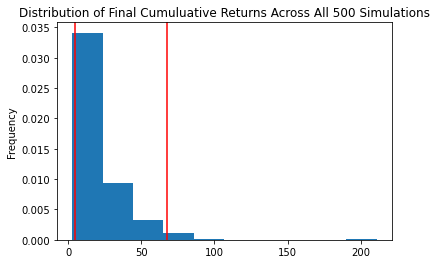

In [18]:
# Plot probability distribution and confidence intervals
MC_stocks.plot_distribution()

### Retirement Analysis

In [19]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = MC_stocks.summarize_cumulative_return()

# Print summary statistics
stocks_tbl

count           500.000000
mean             21.279756
std              17.742786
min               2.673730
25%              10.777631
50%              16.050882
75%              25.861073
max             210.826099
95% CI Lower      4.833243
95% CI Upper     67.650305
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [20]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_ci = round(stocks_tbl[8] * initial_investment, 2)
upper_ci = round(stocks_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $96664.86 and $1353006.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [21]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_ci = round(stocks_tbl[8] * initial_investment, 2)
upper_ci = round(stocks_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $144997.29 and $2029509.16


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [22]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
weights = [.3, .7]

MC_risky = MCSimulation(
    portfolio_data = tickers_df,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*5)

In [23]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_risky.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994171,1.003651,1.005690,0.998589,1.008326,0.996676,1.002153,1.006481,0.996253,0.997792,...,1.000811,1.005792,1.001645,1.000216,1.006006,1.006936,0.993173,1.010825,0.990532,1.007205
2,1.000102,1.005442,1.017358,0.984301,1.006450,0.994377,0.999919,1.002880,0.986877,1.000131,...,1.006142,1.020476,1.010922,1.011061,0.994895,1.011887,0.972044,1.010018,0.990853,1.000075
3,1.010715,1.004024,1.014428,0.995042,1.004876,1.000691,1.003942,1.013934,0.968285,1.000131,...,0.993315,1.017141,1.012588,1.014141,0.984575,1.012331,0.963855,1.019809,0.994165,1.015388
4,0.995031,0.998613,0.997728,0.995166,0.993049,1.004104,1.005870,1.029288,0.960275,1.002278,...,1.007742,1.015819,1.018090,1.014838,0.989097,1.017664,0.969436,1.031500,1.001661,1.024264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.798404,1.973196,2.368461,2.611139,1.851971,1.585394,2.608048,1.926581,2.080562,1.942797,...,1.762001,2.093337,1.906159,2.087216,1.490565,2.571714,1.566967,2.088098,1.921277,1.220477
1257,1.829881,1.947745,2.355156,2.641877,1.882742,1.618976,2.602847,1.920291,2.118462,1.940008,...,1.784143,2.094928,1.906104,2.061610,1.499375,2.563755,1.572903,2.101884,1.915037,1.225908
1258,1.830840,1.941648,2.360562,2.649243,1.905471,1.639049,2.596232,1.940561,2.107914,1.943583,...,1.791942,2.111643,1.924942,2.053368,1.511792,2.566551,1.556454,2.075699,1.916856,1.227496
1259,1.836048,1.953028,2.374578,2.623516,1.883676,1.643293,2.594450,1.955577,2.082154,1.918220,...,1.763093,2.103169,1.963453,2.075132,1.510032,2.579891,1.534290,2.082489,1.902683,1.236123


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

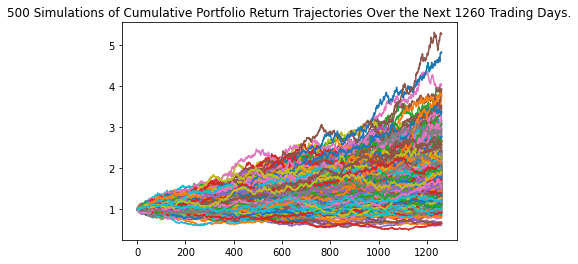

In [24]:
# Plot simulation outcomes
MC_risky.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

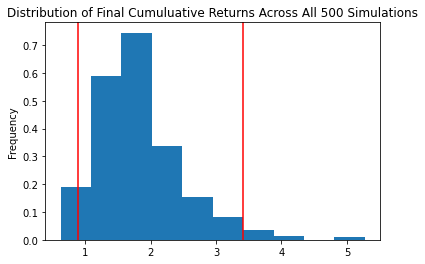

In [25]:
# Plot probability distribution and confidence intervals
MC_risky.plot_distribution()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
risky_tbl = MC_risky.summarize_cumulative_return()

# Print summary statistics
risky_tbl

count           500.000000
mean              1.826945
std               0.652430
min               0.625488
25%               1.390551
50%               1.737697
75%               2.110946
max               5.273639
95% CI Lower      0.891531
95% CI Upper      3.419403
Name: 1260, dtype: float64

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_ci = round(risky_tbl[8] * initial_investment, 2)
upper_ci = round(risky_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17830.62 and $68388.07


### Ten Years Retirement Option

In [28]:
# Set weights
weights = [.4, .6]

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = tickers_df,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*10)

In [29]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998062,0.996876,1.018705,1.002665,1.003168,0.989300,1.006938,0.980772,0.999928,0.994308,...,1.001113,0.998474,0.999588,1.009305,0.998806,1.002084,0.995380,1.002610,0.991039,1.003277
2,1.000651,0.989880,1.022477,0.992698,1.007066,0.989160,1.011771,0.995333,0.999435,0.992118,...,0.996817,0.996160,1.015677,1.013965,1.000188,1.018360,1.008976,1.007385,0.974351,1.016145
3,0.991241,0.991913,1.039985,0.992714,1.003605,0.996559,1.009323,0.995407,1.000248,0.990862,...,0.990335,1.000438,1.019300,1.013240,0.988783,1.017643,1.009834,1.008969,0.980985,1.013704
4,0.997072,0.992375,1.031196,0.982449,1.012444,1.003537,1.017516,0.999654,0.996280,0.993154,...,0.990476,1.008439,1.027747,1.002359,0.992155,1.009666,1.008298,1.014308,0.989967,1.017737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.109288,3.343865,2.951509,2.257908,5.773011,2.276699,3.689039,2.070944,1.529008,2.969619,...,1.140898,3.543817,0.894237,5.008282,3.396199,1.943887,2.067148,3.307986,2.024724,2.122972
2517,3.087137,3.329698,2.951564,2.255650,5.767776,2.283365,3.659391,2.056892,1.512440,2.937967,...,1.142023,3.588094,0.893123,5.005853,3.432816,1.957197,2.071658,3.295786,2.005204,2.120181
2518,3.084650,3.329150,2.935065,2.254433,5.719368,2.307629,3.647339,2.096651,1.525420,2.904652,...,1.142029,3.649695,0.886674,5.030522,3.488702,1.953506,2.050862,3.279302,2.033609,2.152018
2519,3.083565,3.319908,2.935014,2.246344,5.658234,2.322955,3.712725,2.089434,1.532022,2.964880,...,1.139748,3.633322,0.889325,5.000754,3.474276,1.935485,2.053504,3.246004,2.030804,2.193662


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

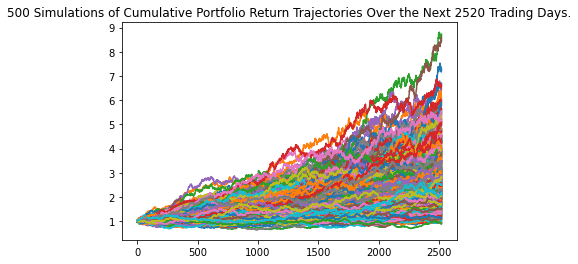

In [30]:
# Plot simulation outcomes
MC_ten.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

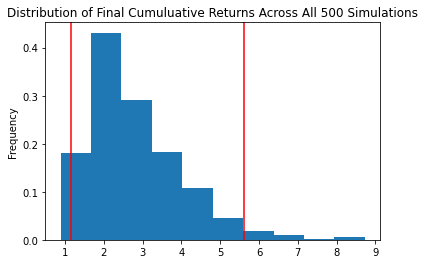

In [31]:
# Plot probability distribution and confidence intervals
MC_ten.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics
ten_tbl

count           500.000000
mean              2.809140
std               1.208641
min               0.886392
25%               1.944797
50%               2.539873
75%               3.481095
max               8.727264
95% CI Lower      1.151033
95% CI Upper      5.612395
Name: 2520, dtype: float64

In [33]:
# Set initial investment
initial_investment = 55000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_ci = round(ten_tbl[8] * initial_investment, 2)
upper_ci = round(ten_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${lower_ci} and ${upper_ci}")

There is a 95% chance that an initial investment of $55000 in the portfolio over the next 10 years will end within in the range of $63306.82 and $308681.73
